<a href="https://colab.research.google.com/github/Ahmed-A-Mohamed/MachineLearning-DeepLearning/blob/master/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Keras_fashion_mnist.ipynb](https://colab.research.google.com/drive/1g44j2w-huoze67il8hU9WUFoxcMmeVL_?usp=drive_link)

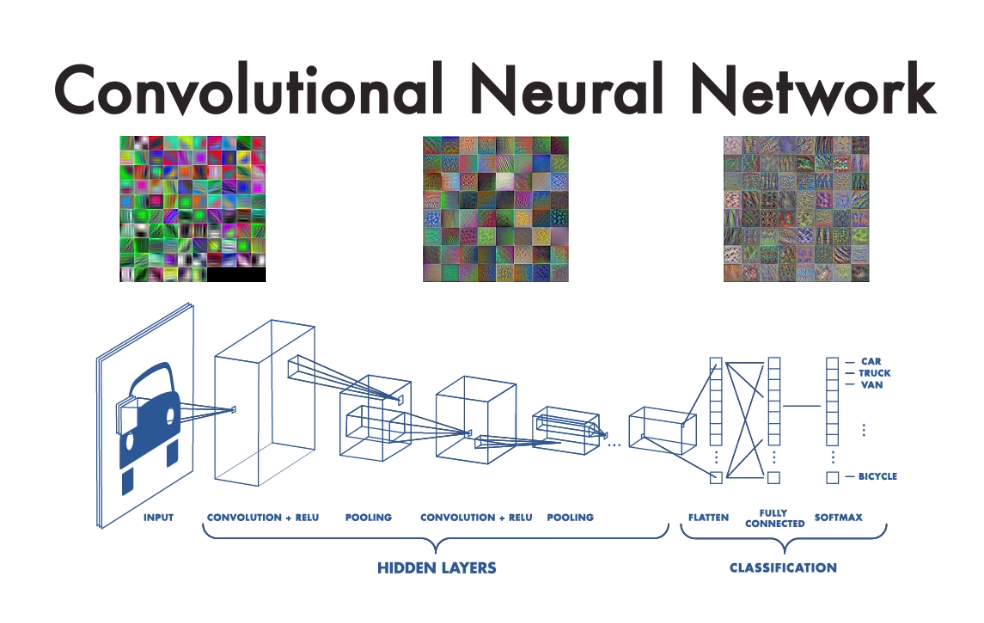

In [ ]:

## 0 ##
# load libraries
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D  # import the components of convolution neural networks
from keras import backend as k  # call keras inside the program as "k" latter
###########################################################
## 1 ##
# prepare the data
batch_size = 128 # split the data to many batches / each batch contains many samples
num_classes = 10 # number of unique classes in the labels
epochs = 12
###########################################################
## 2 ##
# define the dimensions of the image
# 28*28 grayscale image
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
###########################################################
## 3 ##
# define keras image format // ensuring that the data is fed into the neural network with the correct shape.
if k.image_data_format() == 'channels_first': # `channels_first` mean grey scale
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,  1)
  input_shape = (img_rows, img_cols, 1)

else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,  1)
  input_shape = (img_rows, img_cols, 1)

###########################################################
## 4 ##
## Normalization
x_train = x_train/255.0
x_test = x_test/255.0

# check the shape of image after normalization
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
###########################################################
## 5 ##
# convert the class vector into metrices binary class / to help me binary classification
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
###########################################################
## 6 ## create the model
model = Sequential()
# 1st layer => Convolution layer = input layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',  kernel_initializer='he_uniform', input_shape=input_shape)) # 32 number of filters

# 2nd layer => Convolution layer also
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

# 3rd layer => Max pooling which should follow each convolution layer with relu
model.add(MaxPool2D(pool_size=(2,2)))

# 4th layer => Flatten like dimensionality convertion from multiple into single dimension to start networking
model.add(Flatten())

# 5th layer => Dense layer fully connected neurons
model.add(Dense(128, activation='relu',  kernel_initializer='he_uniform')) # 128 number of neurons

# The last layer => Softmax for classification
model.add(Dense(num_classes, activation='softmax'))

# check the summary of the model
model.summary()
###########################################################
## 7 ##
# Compile the model
opt = SGD(lr=0.01, momentum=0.9) # you can create your own optimzer or use build-in one like Adam or Adadelta
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer= keras.optimizers.Adadelta(),
    metrics=['accuracy']  # Corrected from 'metrices' to 'metrics'
)

###########################################################
## 8 ##
# Fit the model
model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs,
          verbose = 1,
          validation_data=(x_test,y_test))
###########################################################
## 9 ##
# evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss=', score[0])
print('Test accuracy', score[1])
###########################################################
## 10 ##
# Saving the model
model.save("model.h5") # there are many options of saving formats = YAML, JSON or H5
print("Saved")
###########################################################
###########################################################
###########################################################
###########################################################
###########################################################
## 11 ##
# Restoring Model and Making predictions
# Like another process and steps
from keras.preprocessing.image import load_img # load the image
from keras.preprocessing.image import img_to_array # convert the image into array format
from keras.models import load_model  # import my saved model

#  preprocessing function
def load_img(filename):
  img = load_img(filename, greyscale=True, target_size(28,28)) # load image
  img = img_to_array(img) # convert the image into array format
  img = img.reshape(1, 28, 28, 1) # reshaping the img to single sample with one channel (= grey scale) => 1 = single img/ 28*28 = dimensions/ 1 = greyscale
  img = img.astype('float32') # preparing to pixel data => make img the same of type that used in previous saved model
  img = img/255.0 # Normalization
  return img

###########################################################
## 12 ##
# prediction

# Upload new data image to predict it
def run_example():
  img = load_img("/content/drive/MyDrive/Deep learning/iTi Deep Learning/sample_image.png") # loading img
  model = load_model('PATH model.h5') # loading the model
  result = model.prediction_classes(img) # prediction the class
  print(result[0])

# entry point, run the example
run_example

###########################################################
###########################################################
###########################################################
###########################################################
###########################################################
# If the prediction is wrong, we need to inhance the model to increase its accuracy.
## 13 ##
# Improving Predictive Accuracy

# tuning the hyperparameters in the model
def define_model():

      model = Sequential()
      # 1st layer => Convolution layer = input layer
      model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform' ,input_shape=input_shape)) # 32 number of filters
      # 3rd layer => Max pooling which should follow each convolution layer with relu
      model.add(MaxPool2D(pool_size=(2,2)))
      # 4th layer => Flatten like dimensionality convertion from multiple into single dimension to start networking
      model.add(Flatten())
      # 5th layer => Dense layer fully connected neurons
      model.add(Dense(100, activation='relu',  kernel_initializer='he_uniform')) # <<<<<<<<<<<<<<<< change the dense into 100 number of neurons
      # The last layer => Softmax for classification
      model.add(Dense(num_classes, activation='softmax'))
      # Compile the model
      opt = SGD(lr=0.01, momentum=0.9) # you can create your own optimzer or use build-in one like Adam or Adadelta <<<<<<<<<<<<<<<<<<<< change the optimizer
      model.compile(
          loss=keras.losses.categorical_crossentropy,
          optimizer=opt, # keras.optimizers.Adadelta()
          metrics=['accuracy']  # Corrected from 'metrices' to 'metrics'
      )

      return model

# run the test harness for evaluating a model
def run_example():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # define model
  model = define_model()
  # fit model
  model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0) # <<<<<<<<<<<<<<<<<<<<<<<<<<< change the number of epoch and batch_size
  # save model
  model.save('final_model.h5')

# entry point, run the test
run_example()

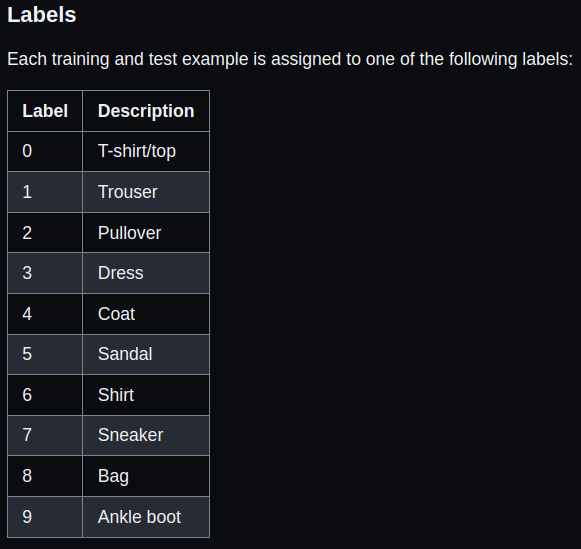